In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=4

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475333, 4, 16)
strides:  (512, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x238392e5040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475333,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x23847b09040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380266

In [9]:
training_sample

380266

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380266, 4, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380266,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380266, 4, 15) (380266, 1) (95067, 4, 15) (95067, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#activation='relu'),
    keras.layers.GRU(units=64),#activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 256)            209664    
                                                                 
 gru_1 (GRU)                 (None, 4, 128)            148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=280,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/280
2971/2971 [==============================] - 61s 17ms/step - loss: 0.5735 - accuracy: 0.7393 - val_loss: 0.5579 - val_accuracy: 0.7531
Epoch 2/280
2971/2971 [==============================] - 61s 20ms/step - loss: 0.5712 - accuracy: 0.7393 - val_loss: 0.5570 - val_accuracy: 0.7531
Epoch 3/280
2971/2971 [==============================] - 53s 18ms/step - loss: 0.5657 - accuracy: 0.7393 - val_loss: 0.5471 - val_accuracy: 0.7531
Epoch 4/280
2971/2971 [==============================] - 53s 18ms/step - loss: 0.5491 - accuracy: 0.7400 - val_loss: 0.5259 - val_accuracy: 0.7522
Epoch 5/280
2971/2971 [==============================] - 55s 18ms/step - loss: 0.5281 - accuracy: 0.7416 - val_loss: 0.5061 - val_accuracy: 0.7518
Epoch 6/280
2971/2971 [==============================] - 50s 17ms/step - loss: 0.5127 - accuracy: 0.7399 - val_loss: 0.4942 - val_accuracy: 0.7497
Epoch 7/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.5061 - accuracy: 0.7383 - val_loss: 0

2971/2971 [==============================] - 48s 16ms/step - loss: 0.4540 - accuracy: 0.7586 - val_loss: 0.4465 - val_accuracy: 0.7635
Epoch 57/280
2971/2971 [==============================] - 52s 17ms/step - loss: 0.4536 - accuracy: 0.7591 - val_loss: 0.4439 - val_accuracy: 0.7640
Epoch 58/280
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4531 - accuracy: 0.7598 - val_loss: 0.4451 - val_accuracy: 0.7620
Epoch 59/280
2971/2971 [==============================] - 54s 18ms/step - loss: 0.4527 - accuracy: 0.7603 - val_loss: 0.4439 - val_accuracy: 0.7670
Epoch 60/280
2971/2971 [==============================] - 52s 17ms/step - loss: 0.4521 - accuracy: 0.7605 - val_loss: 0.4417 - val_accuracy: 0.7668
Epoch 61/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4517 - accuracy: 0.7617 - val_loss: 0.4440 - val_accuracy: 0.7688
Epoch 62/280
2971/2971 [==============================] - 53s 18ms/step - loss: 0.4512 - accuracy: 0.7620 - val_loss: 0.4455 

2971/2971 [==============================] - 48s 16ms/step - loss: 0.4384 - accuracy: 0.7745 - val_loss: 0.4363 - val_accuracy: 0.7756
Epoch 112/280
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4383 - accuracy: 0.7745 - val_loss: 0.4314 - val_accuracy: 0.7780
Epoch 113/280
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4383 - accuracy: 0.7747 - val_loss: 0.4331 - val_accuracy: 0.7763
Epoch 114/280
2971/2971 [==============================] - 50s 17ms/step - loss: 0.4381 - accuracy: 0.7748 - val_loss: 0.4316 - val_accuracy: 0.7781
Epoch 115/280
2971/2971 [==============================] - 53s 18ms/step - loss: 0.4381 - accuracy: 0.7751 - val_loss: 0.4336 - val_accuracy: 0.7772
Epoch 116/280
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4379 - accuracy: 0.7749 - val_loss: 0.4374 - val_accuracy: 0.7756
Epoch 117/280
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4378 - accuracy: 0.7751 - val_loss: 0

2971/2971 [==============================] - 52s 17ms/step - loss: 0.4305 - accuracy: 0.7796 - val_loss: 0.4257 - val_accuracy: 0.7820
Epoch 167/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4305 - accuracy: 0.7795 - val_loss: 0.4286 - val_accuracy: 0.7806
Epoch 168/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4304 - accuracy: 0.7794 - val_loss: 0.4293 - val_accuracy: 0.7816
Epoch 169/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4304 - accuracy: 0.7798 - val_loss: 0.4272 - val_accuracy: 0.7815
Epoch 170/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4302 - accuracy: 0.7797 - val_loss: 0.4264 - val_accuracy: 0.7823
Epoch 171/280
2971/2971 [==============================] - 50s 17ms/step - loss: 0.4301 - accuracy: 0.7800 - val_loss: 0.4286 - val_accuracy: 0.7807
Epoch 172/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4301 - accuracy: 0.7797 - val_loss: 0

2971/2971 [==============================] - 51s 17ms/step - loss: 0.4267 - accuracy: 0.7814 - val_loss: 0.4252 - val_accuracy: 0.7839
Epoch 222/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4266 - accuracy: 0.7814 - val_loss: 0.4248 - val_accuracy: 0.7837
Epoch 223/280
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4265 - accuracy: 0.7813 - val_loss: 0.4247 - val_accuracy: 0.7840
Epoch 224/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4264 - accuracy: 0.7815 - val_loss: 0.4273 - val_accuracy: 0.7807
Epoch 225/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4265 - accuracy: 0.7813 - val_loss: 0.4279 - val_accuracy: 0.7804
Epoch 226/280
2971/2971 [==============================] - 45s 15ms/step - loss: 0.4264 - accuracy: 0.7811 - val_loss: 0.4224 - val_accuracy: 0.7846
Epoch 227/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4263 - accuracy: 0.7816 - val_loss: 0

2971/2971 [==============================] - 45s 15ms/step - loss: 0.4235 - accuracy: 0.7826 - val_loss: 0.4254 - val_accuracy: 0.7840
Epoch 277/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4234 - accuracy: 0.7826 - val_loss: 0.4245 - val_accuracy: 0.7850
Epoch 278/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4235 - accuracy: 0.7835 - val_loss: 0.4239 - val_accuracy: 0.7831
Epoch 279/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4234 - accuracy: 0.7828 - val_loss: 0.4263 - val_accuracy: 0.7840
Epoch 280/280
2971/2971 [==============================] - 44s 15ms/step - loss: 0.4234 - accuracy: 0.7827 - val_loss: 0.4235 - val_accuracy: 0.7844


In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 15s 5ms/step


In [25]:
stop=t.time()-start
print(stop)

13715.78118133545


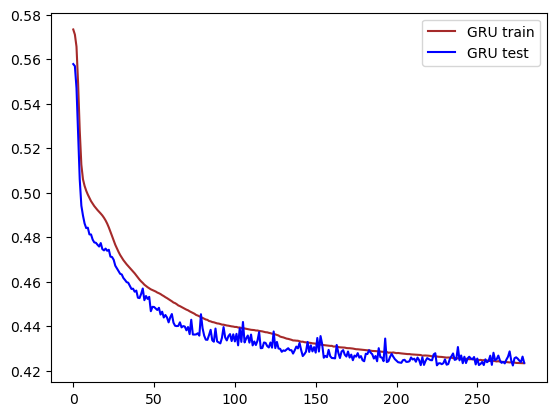

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95067, 1)

In [29]:
pred_y

array([[8.2266510e-05],
       [1.1989030e-03],
       [3.8708597e-03],
       ...,
       [4.9314640e-02],
       [4.9669396e-02],
       [5.0321870e-02]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95067)

0.14154511327391947
0.2388470601243644
0.37622481746147407
0.27978066129015466


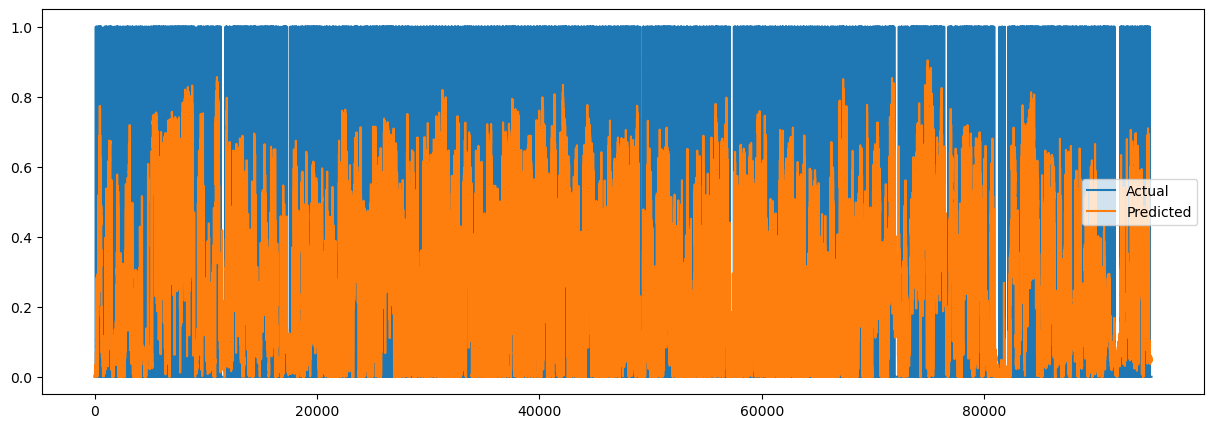

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380266, 4, 15)

In [33]:
np.shape(train_y)

(380266, 1)

In [34]:
np.shape(test_X)

(95067, 4, 15)

In [35]:
np.shape(test_y)

(95067, 1)

14855/14855 [==============================] - 69s 5ms/step


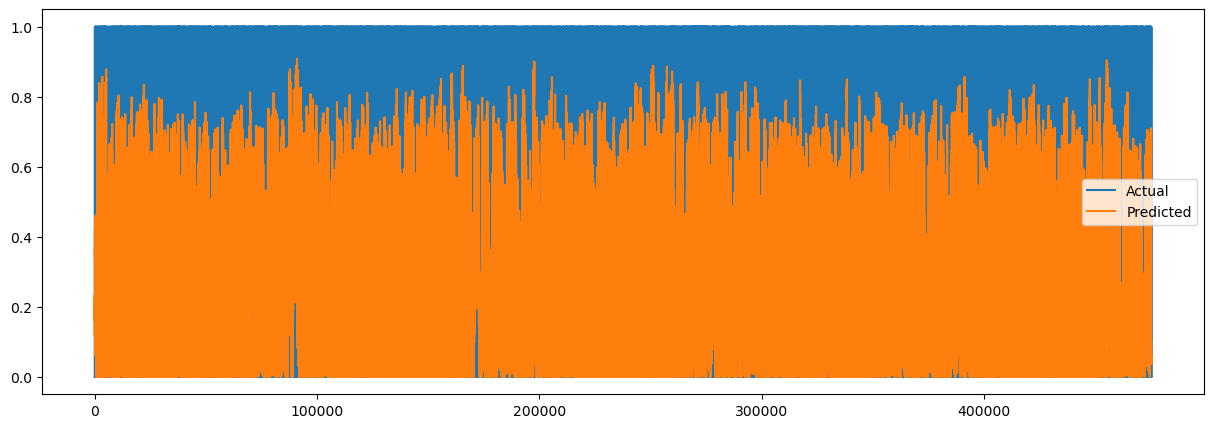

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

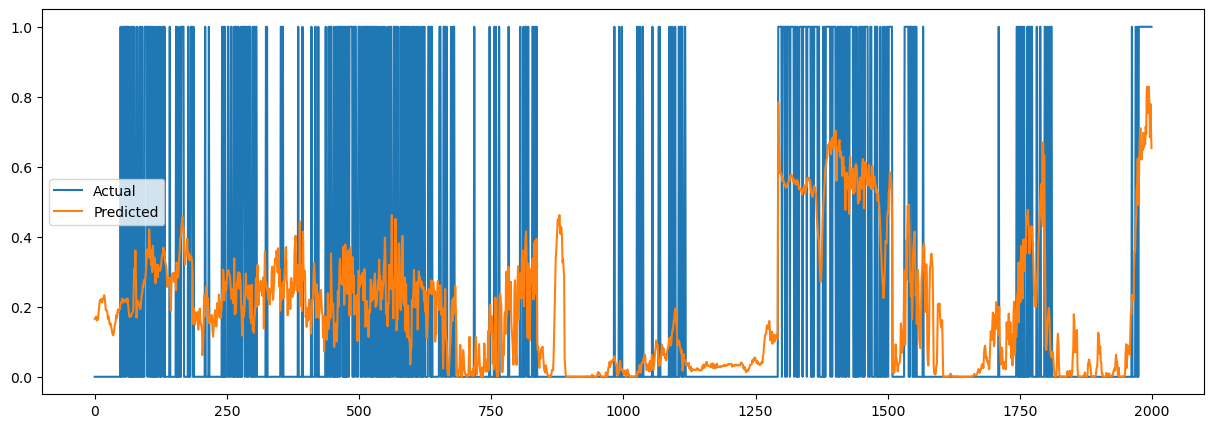

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25793917]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.61311713]
[0.82165087]
total acc [0.78347601]


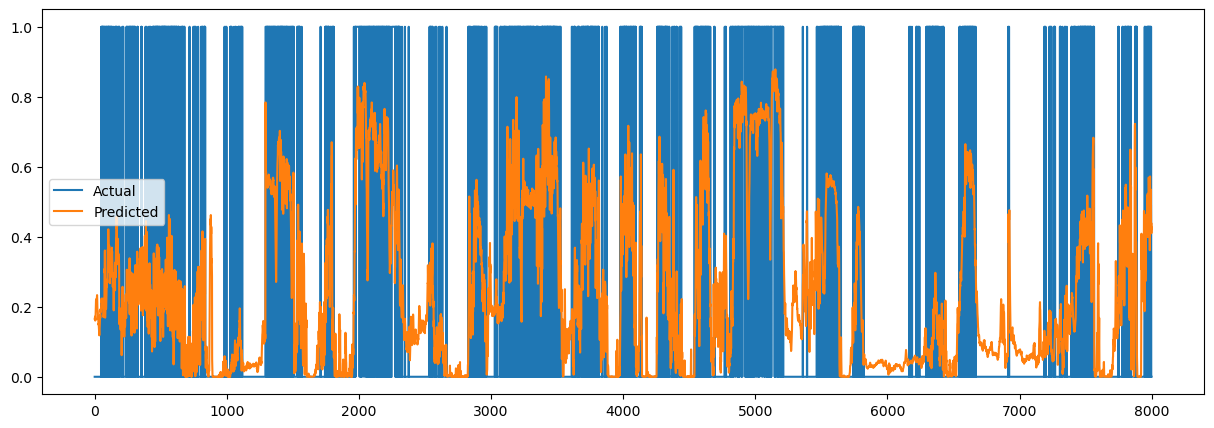

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

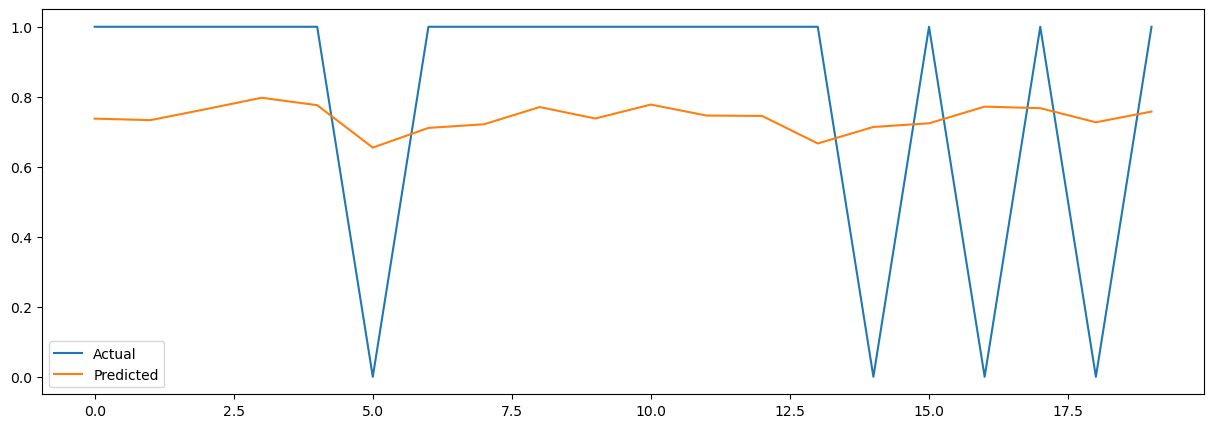

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

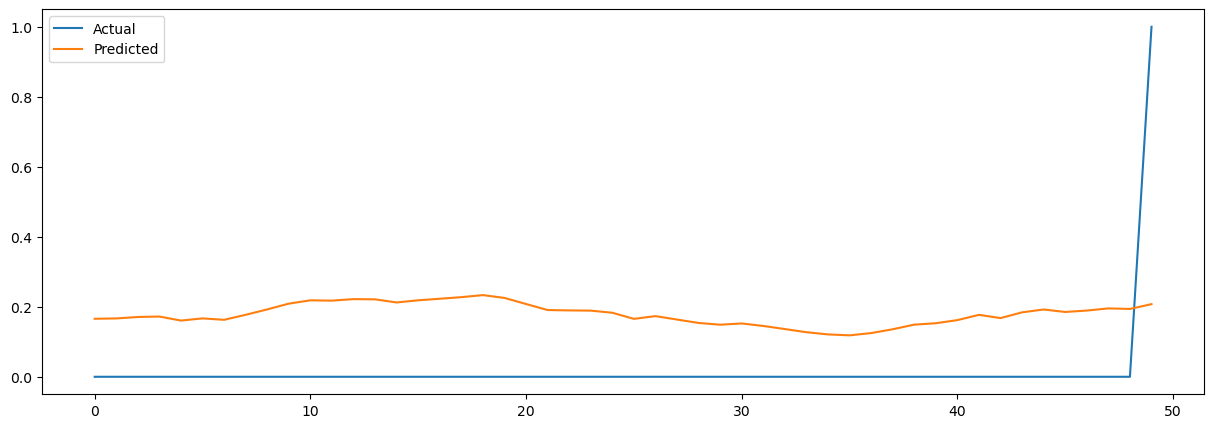

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

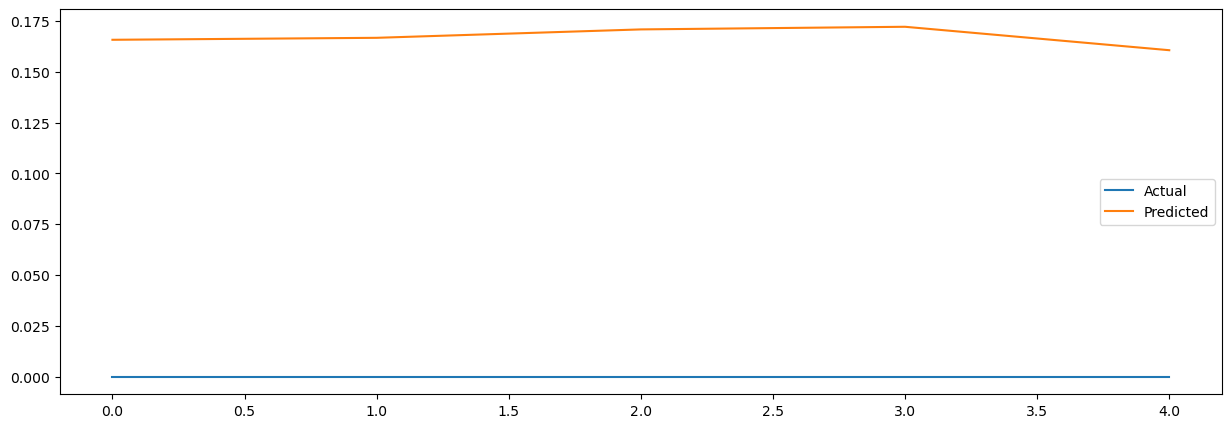

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()